<a href="https://colab.research.google.com/github/fedhere/DSPS_FBianco/blob/master/labs/fitLine2Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

for DSPS written by fbb in 2021


# code and data inspired by https://arxiv.org/abs/1008.4686

In [7]:
import numpy as np
import pylab as plt

In [11]:
def line(x, m, b):
  return m * x + b


In [50]:
# from the MCMC quickstart tutorial https://emcee.readthedocs.io/en/stable/tutorials/quickstart/
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534 # this parameter represents the expected **hetheroschedastic** standard deviation of the error that produces scatter

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = line(x, m_true, b_true)

y += np.abs(f_true * y) * np.random.randn(N) #add scatter
y += yerr * np.random.randn(N) #add uncertainty



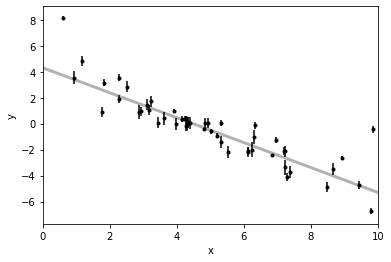

In [51]:
# plot
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [23]:
X = np.c_[np.ones(len(x)), x]
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([ 4.5778593 , -0.98216235])

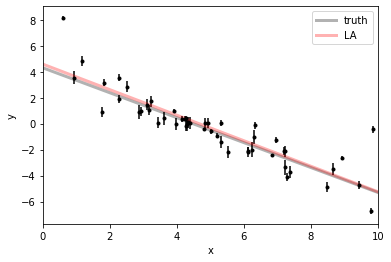

In [34]:
# plot
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
#adding linear algebra solution
plt.plot(x0, theta_best[1] * x0 + theta_best[0], "r", 
         alpha=0.3, lw=3, label="LA")
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");
plt.legend();

In [28]:
A = np.vander(x, 2) #alternative to np.c_, same difference, but note the order of the columns
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, y / yerr ** 2))
print("Least-squares estimates:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))
print("b = {0:.3f} ± {1:.3f}".format(w[1], np.sqrt(cov[1, 1])))


Least-squares estimates:
m = -1.104 ± 0.016
b = 5.441 ± 0.091


In [22]:
A

array([[0.59677897, 1.        ],
       [0.9210494 , 1.        ],
       [1.15618395, 1.        ],
       [1.75451756, 1.        ],
       [1.8249173 , 1.        ],
       [2.26851454, 1.        ],
       [2.28263231, 1.        ],
       [2.50455365, 1.        ],
       [2.86139335, 1.        ],
       [2.93714046, 1.        ],
       [3.12261223, 1.        ],
       [3.17285482, 1.        ],
       [3.22958914, 1.        ],
       [3.43178016, 1.        ],
       [3.61788656, 1.        ],
       [3.92117518, 1.        ],
       [3.98044255, 1.        ],
       [4.14826212, 1.        ],
       [4.2310646 , 1.        ],
       [4.2583029 , 1.        ],
       [4.26351307, 1.        ],
       [4.30862763, 1.        ],
       [4.33701173, 1.        ],
       [4.38572245, 1.        ],
       [4.80931901, 1.        ],
       [4.83034264, 1.        ],
       [4.93685098, 1.        ],
       [5.01836676, 1.        ],
       [5.19485119, 1.        ],
       [5.31551374, 1.        ],
       [5.

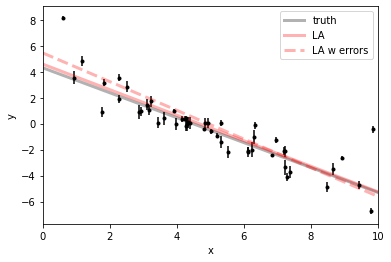

In [38]:
# plot
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
#adding linear algebra solution
plt.plot(x0, theta_best[1] * x0 + theta_best[0], "r", 
         alpha=0.3, lw=3, label="LA")
plt.plot(x0, w[0] * x0 + w[1], "r--", 
         alpha=0.3, lw=3, label="LA w errors")
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");
plt.legend()

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = np.c_[np.ones(len(x)), x]
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([ 0.        , -0.98216235]), 4.577859303753362)

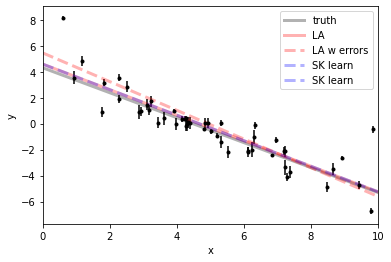

In [59]:
# plot
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
#adding linear algebra solution
plt.plot(x0, theta_best[1] * x0 + theta_best[0], "r", 
         alpha=0.3, lw=3, label="LA")
plt.plot(x0, w[0] * x0 + w[1], "r--", 
         alpha=0.3, lw=3, label="LA w errors")
X0 = np.c_[np.ones(500), np.linspace(0, 10, 500)]
plt.plot(X0, lr.coef_ * X0 + lr.intercept_, "b--", 
         alpha=0.3, lw=3, label="SK learn")
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");
plt.legend()

In [69]:
def L2fitfunc(args, x, y):
  m, b = args
  return np.sum((y-line(x, m, b))**2)
fitfunc((m_true, b_true), x, y)


72.04469705321662

In [72]:
fitfunc((10,1), x, y)


165464.49565515076

In [70]:
import scipy
from scipy.optimize import minimize

In [78]:
initialGuess = (10, 1)
solutionL2  = minimize(fitfunc, initialGuess, args=(x, y))
solutionL2.x

array([-0.98216239,  4.57785949])

In [79]:
def chi2(args, x, y, yerr):
  m, b = args
  return np.sum((y-line(x, m, b))**2 / yerr**2)
chi2((m_true, b_true), x, y, yerr)

1432.106645168334

In [80]:
initialGuess = (10, 1)
solutionChi2  = minimize(chi2, initialGuess, args=(x, y, yerr))
solutionChi2.x

array([-1.10407574,  5.44055542])

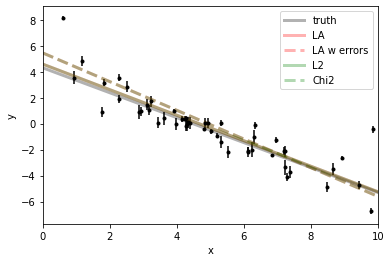

In [85]:
# plot
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3, label="truth")
#adding linear algebra solution
plt.plot(x0, theta_best[1] * x0 + theta_best[0], "r", 
         alpha=0.3, lw=3, label="LA")
plt.plot(x0, w[0] * x0 + w[1], "r--", 
         alpha=0.3, lw=3, label="LA w errors")
#X0 = np.c_[np.ones(500), np.linspace(0, 10, 500)]
#plt.plot(X0, lr.coef_ * X0 + lr.intercept_, "b--", 
#         alpha=0.3, lw=3, label="SK learn")
#optimized results
plt.plot(x0, solutionL2.x[0] * x0 +solutionL2.x[1], "g-", 
         alpha=0.3, lw=3, label="L2")
plt.plot(x0, solutionChi2.x[0] * x0 +solutionChi2.x[1], "g--", 
         alpha=0.3, lw=3, label="Chi2")
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");
plt.legend()

In [100]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr ** 2 + model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

def log_prior(theta):
    m, b, log_f = theta
    if -5.0 < m < 0.5 and 0.0 < b < 10.0 and -10.0 < log_f < 1.0:
        return 0.0
    return -np.inf


def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)


In [101]:
!pip install emcee

In [102]:
import emcee

pos = np.array([solutionL2.x[0],  solutionL2.x[1], 1e-1]) + 1e-4 * np.random.randn(32, 3)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_probability, args=(x, y, yerr)
)
sampler.run_mcmc(pos, 5000, progress=True);


100%|██████████| 5000/5000 [00:09<00:00, 535.26it/s]


In [104]:
tau = sampler.get_autocorr_time()
print(tau)


[39.38941735 39.55037695 50.86505199]


In [105]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)


(10432, 3)


In [107]:
!pip install corner

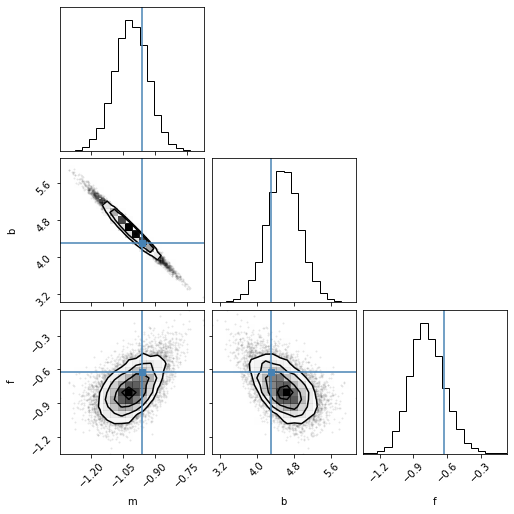

In [109]:
import corner

fig = corner.corner(
    flat_samples, labels=["m", "b", "f"], truths=[m_true, b_true, np.log(f_true)]
);